# 📊 Introduction to Statistical Inference  

---

## ❓ **What is Statistical Inference?**  
Statistical inference is the process of **drawing conclusions about a population** based on **sample data**.  
- We rarely have access to the entire population.  
- Instead, we **collect a sample** and use probability theory to make predictions or estimates about the whole group.  

Example:  
- You want to know the **average height** of all adults in a city.  
- Measuring everyone is impractical, so you measure **200 adults** (sample) and infer the **population mean**.  

---

## 👥 **Population vs. Sample**  

| Term          | Definition                                                                 |
|----------------|---------------------------------------------------------------------------|
| **Population** | The **entire set** of individuals or objects of interest. Example: *all adults in a city*. |
| **Sample**     | A **subset** of the population selected for analysis. Example: *200 measured adults*. |

### 🖼 **Visual Representation**  


---

## 🎯 **Goal of Statistical Inference**  
- **Estimate** population parameters (e.g., mean \(\mu\), proportion \(p\)).  
- **Assess the reliability** of these estimates using:  
  - **Confidence intervals**  
  - **Hypothesis testing**  
  - **p-values** and **error rates**  

---

## 🧠 **Key Concepts**  
- **Parameters:** Numerical characteristics of a population (e.g., \(\mu, \sigma\)).  
- **Statistics:** Calculated from sample data (e.g., \(\bar{x}, s\)) and used to estimate parameters.  
- **Sampling Error:** The natural variation between a sample statistic and its population parameter.  

---

## 🧪 **Example in Python**  



Population Mean: 170.01 cm
Sample Mean: 170.24 cm


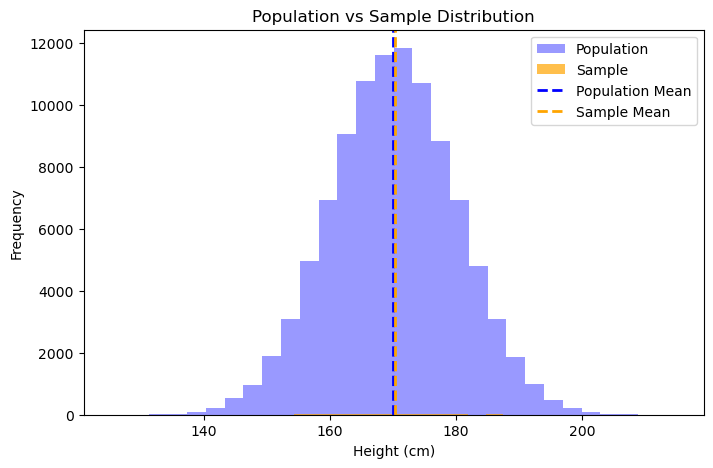

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Population: simulate heights (mean=170, std=10)
np.random.seed(42)
population = np.random.normal(170, 10, 100000)

# Draw a random sample of 200 people
sample = np.random.choice(population, 200, replace=False)

# Calculate population and sample means
population_mean = np.mean(population)
sample_mean = np.mean(sample)

print(f"Population Mean: {population_mean:.2f} cm")
print(f"Sample Mean: {sample_mean:.2f} cm")

# Visualization
plt.figure(figsize=(8,5))
plt.hist(population, bins=30, alpha=0.4, label='Population', color='blue')
plt.hist(sample, bins=20, alpha=0.7, label='Sample', color='orange')
plt.axvline(population_mean, color='blue', linestyle='dashed', linewidth=2, label='Population Mean')
plt.axvline(sample_mean, color='orange', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.title('Population vs Sample Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 📐 Point Estimation and Interval Estimation  

---

## 🎯 **Point Estimation**  
- A **single value estimate** of a population parameter.  
- Example: Using the **sample mean (\(\bar{x}\))** to estimate the **population mean (\(\mu\))**.  

### ✅ **Key Idea**  
Point estimates are **simple**, but they **don’t convey uncertainty**.  

---

## 📏 **Interval Estimation**  
- Provides a **range of values** within which the population parameter is likely to lie.  
- This range is called a **Confidence Interval (CI)**.  

### 📌 **Confidence Interval Formula**  

\[
CI = \bar{x} \pm z \cdot \frac{s}{\sqrt{n}}
\]

Where:  
- \(\bar{x}\) = Sample mean  
- \(z\) = Z-score for the desired confidence level (e.g., 1.96 for 95%)  
- \(s\) = Sample standard deviation  
- \(n\) = Sample size  

---

## 🧠 **Intuition Behind Confidence Intervals**  
- A **95% CI** means: If we repeatedly took samples and built CIs, **95% of them** would contain the true population parameter.  
- It does **not** mean there’s a 95% chance that a single CI contains the parameter—it’s about the process, not the specific interval.  

---

## 📊 **Example in Python**  




In [1]:
import numpy as np
import scipy.stats as stats

# Simulate sample data (e.g., heights)
np.random.seed(42)
sample = np.random.normal(loc=170, scale=10, size=50)

# Calculate point estimate (mean)
x_bar = np.mean(sample)

# Sample standard deviation
s = np.std(sample, ddof=1)

# Sample size
n = len(sample)

# Z-score for 95% confidence level
z = stats.norm.ppf(0.975)  # two-tailed

# Margin of error
margin = z * (s / np.sqrt(n))

# Confidence Interval
lower = x_bar - margin
upper = x_bar + margin

print(f"Point Estimate (mean): {x_bar:.2f} cm")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f}) cm")

Point Estimate (mean): 167.75 cm
95% Confidence Interval: (165.16, 170.33) cm


In [2]:
import numpy as np
from scipy.stats import norm, t

# Sample Data
data = [12, 14, 15, 16, 17, 18, 19]

# calculate mean and standard deviation
mean = np.mean(data)
std = np.std(data, ddof=1)

# 95% Confidence Innterval (using t-distribution)
n = len(data)
t_value = t.pdf(0.975, df = n - 1)
margin_of_error = t_value * (std / np.sqrt(n))
ci = (mean - margin_of_error, mean + margin_of_error)
print("95% confidence Interval: ", ci)

95% confidence Interval:  (15.648759623903372, 16.065526090382345)


# 📊 Constructing Confidence Intervals  

Confidence intervals (CIs) are a range of values that are likely to contain the **true population parameter**. Instead of giving just a single estimate (point estimate), a CI provides an interval that accounts for **sampling variability** and **uncertainty**.  

---

## 🧮 **1. Confidence Interval for Means (σ Unknown)**  

When the **population standard deviation (\(\sigma\))** is **unknown**, we estimate variability using the **sample standard deviation (s)**. For **small samples (\(n < 30\))**, the **t-distribution** is used because it has heavier tails, which accounts for the additional uncertainty in estimating \(\sigma.\)  

### Formula:  

$$
CI = \bar{x} \pm t \cdot \frac{s}{\sqrt{n}}
$$  

### Terms Explained:  
- \(\bar{x}\) → **Sample mean**, our best estimate of the population mean.  
- \(t\) → **Critical value from the t-distribution**, depends on:  
  - Desired confidence level (e.g., 95%).  
  - Degrees of freedom (\(df = n - 1\)).  
- \(s\) → **Sample standard deviation**, measures variability within the sample.  
- \(n\) → **Sample size**.  

📌 **Why use the t-distribution?**  
- For small samples, the **normal (z) distribution** underestimates variability.  
- The **t-distribution** accounts for the extra uncertainty due to estimating \(\sigma\) from \(s\).  
- As \(n\) increases (\(n > 30\)), the t-distribution approaches the normal distribution.

---

## 📉 **2. Confidence Interval for Proportions**  

When estimating a **population proportion**, such as the percentage of voters favoring a candidate, the formula uses the **normal (z) distribution**:  

### Formula:  

$$
CI = \hat{p} \pm z \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$  

### Terms Explained:  
- \(\hat{p}\) → **Sample proportion**, e.g., \( \hat{p} = \frac{x}{n} \) where \(x\) is the number of successes.  
- \(z\) → **Critical z-value** for the chosen confidence level:  
  - 90% → \(z = 1.645\)  
  - 95% → \(z = 1.96\)  
  - 99% → \(z = 2.576\)  
- \(n\) → **Sample size**.  

📌 **Why use the z-distribution here?**  
- For proportions, the sampling distribution is approximately normal if \(n\) is large and both \(np\) and \(n(1-p)\) are greater than 5.  
- This is justified by the **Central Limit Theorem**.  

---

## 📌 **Interpretation of Confidence Intervals**  

A **95% confidence interval** does **not** mean there’s a 95% probability the true parameter is inside your specific interval.  
Instead, it means:  
> If you repeat the sampling process **many times**, about **95% of the constructed intervals** will contain the true population parameter.  

---

## ✅ **Example Use Cases**  

1. **Means**: Estimating the average exam score from a small class of 20 students where σ is unknown.  
2. **Proportions**: Determining the proportion of people in a city who support a new policy based on a sample survey.  

---

## 🧭 **Steps to Construct a CI in Practice**  
1. Collect a **random sample**.  
2. Compute the **sample statistic** (\(\bar{x}\) or \(\hat{p}\)).  
3. Find the **appropriate critical value** (\(t\) or \(z\)) based on your confidence level.  
4. Compute the **margin of error**:  
   - Means: \( t \cdot \frac{s}{\sqrt{n}} \)  
   - Proportions: \( z \cdot \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}} \)  
5. Write the CI as:  
   - Means: \(( \bar{x} - ME,\; \bar{x} + ME )\)  
   - Proportions: \(( \hat{p} - ME,\; \hat{p} + ME )\)  

---


In [27]:
################################# Exercise 1 #################################
import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt

np.random.seed(42)
sample_data = np.random.normal(loc = 170,scale=1, size=50)

mean = np.mean(sample_data)
std = np.std(sample_data, ddof=1)
n = len(data)

z_value = norm.ppf(0.975)
margin_of_error = z_value * (std/np.sqrt(n))
ci = (mean - margin_of_error, mean + margin_of_error)
print("95% confidence Interval: ", ci)

95% confidence Interval:  (169.08286729131538, 170.46618489817234)


In [36]:
################################# Exercise 2 #################################
import numpy as np
from scipy.stats import norm
import requests
from pathlib import Path
import pandas as pd
data_path = Path("data")
data_path.mkdir(exist_ok=True)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/iris.csv"
data = requests.get(url)

file_path = data_path / "iris.csv"
with open(file_path, "w+") as file:
    file.write(data.text)

df = pd.read_csv(file_path)
df.describe()

column_sepal_width = df["sepal_width"]
print(column_sepal_width[:5])

mean = column_sepal_width.mean()
std = np.std(column_sepal_width,ddof=1)


z_value = norm.ppf(0.975)
margin_of_error = z_value * (std/np.sqrt(n))
ci = (mean - margin_of_error, mean + margin_of_error)
print("95% confidence Interval: ", ci)

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64
95% confidence Interval:  (2.7344450040415467, 3.3802216626251207)
